In [2]:
# !pip install tensorflow

In [19]:
from PIL import Image
import glob

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 128x128 사이즈로 바꾸어 저장합니다.
	target_size=(128,128)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")

In [20]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = r"moving\rockgame\dataset\scissors"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

0  images to be resized.
0  images resized.
가위 이미지 resize 완료!


In [21]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = r"moving\rockgame\dataset\rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

0  images to be resized.
0  images resized.
바위 이미지 resize 완료!


In [22]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = r"moving\rockgame\dataset\paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

0  images to be resized.
0  images resized.
보 이미지 resize 완료!


In [23]:
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image

def load_data(img_path, number_of_data=3914):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=128
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissors/*.jpg'):
        img = Image.open(file).resize((128, 128))  # 크기를 (28, 28)로 변경
        img = np.array(img, dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = Image.open(file).resize((128, 128))  # 크기를 (28, 28)로 변경
        img = np.array(img, dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = Image.open(file).resize((128, 128))  # 크기를 (28, 28)로 변경
        img = np.array(img, dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "dataset" #폴더명
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3914 입니다.
x_train shape: (3914, 128, 128, 3)
y_train shape: (3914,)


In [8]:
# for i in range(100):
#     plt.imshow(x_train[i])
#     print('라벨 : ', y_train[i])
#     plt.show()

In [24]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(20, activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,394,900 (28.21 MB)

 Trainable params: 7,394,900 (28.21 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=3)

Epoch 1/3
123/123 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.6817 - loss: 0.8973
Epoch 2/3
123/123 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - accuracy: 0.9982 - loss: 0.0151
Epoch 3/3
123/123 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - accuracy: 1.0000 - loss: 0.0042


In [26]:
image_dir_path = "dataset/test"
(x_test, y_test)=load_data(image_dir_path,328)
x_test_norm = x_test/255.0

print("x_test shape : {}".format(x_test.shape))
print("y_test shape : {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 328 입니다.
x_test shape : (328, 128, 128, 3)
y_test shape : (328,)


In [27]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

11/11 - 0s - 26ms/step - accuracy: 0.4146 - loss: 3.2796
test_loss : 3.279606819152832
test_accuracy : 0.4146341383457184


In [28]:
predicted_result = model.predict(x_test_norm)	# model이 추론한 확률값
predicted_labels = np.argmax(predicted_result, axis=1)

idx=100		# 값을 변경해서 찾아보자
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
model.predict() 결과 :  [1.49036702e-02 9.84521210e-01 5.75171784e-04 6.53263034e-13
 9.78370249e-12 9.04108670e-14 1.44081127e-11 6.68353068e-13
 8.44164738e-11 9.53574112e-12 2.43000471e-13 3.08457795e-13
 3.22850913e-11 9.18258317e-11 2.60524485e-13 6.47100221e-11
 2.78009317e-11 1.02119965e-10 7.57230112e-10 2.24560370e-10]
model이 추론한 가장 가능성이 높은 결과 :  1
실제 데이터의 라벨 :  0


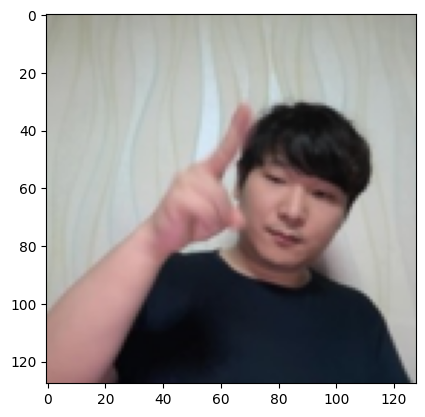

In [29]:
plt.imshow(x_test[idx], cmap=plt.cm.binary)
plt.show()

예측확률분포: [2.0821650e-01 7.9134190e-01 4.4158721e-04 6.5608906e-13 1.4983674e-11
 1.7567760e-13 1.9379184e-11 1.4847367e-12 2.2363719e-10 2.0319128e-11
 3.2248637e-13 6.6874983e-13 7.1165185e-11 1.3931660e-10 4.3819221e-13
 2.1627837e-10 6.6977306e-11 3.1750472e-10 1.4514104e-09 3.1535852e-10]
라벨: 0, 예측결과: 1
43


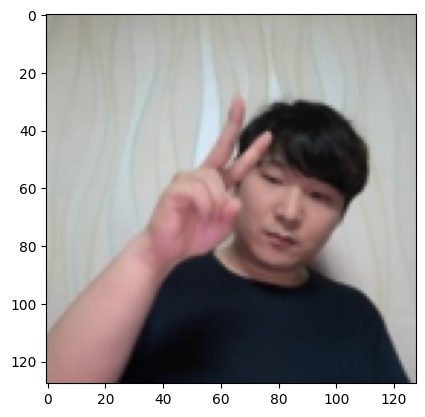

예측확률분포: [1.0024588e-02 9.8974842e-01 2.2699597e-04 4.7554528e-13 6.5320136e-12
 4.3350269e-14 1.2234731e-11 4.7487817e-13 5.0727901e-11 5.4120189e-12
 1.3809360e-13 2.0099784e-13 1.7690746e-11 6.2290909e-11 1.5495752e-13
 4.3155639e-11 1.9115676e-11 7.5063421e-11 5.9424604e-10 1.4530024e-10]
라벨: 0, 예측결과: 1
89


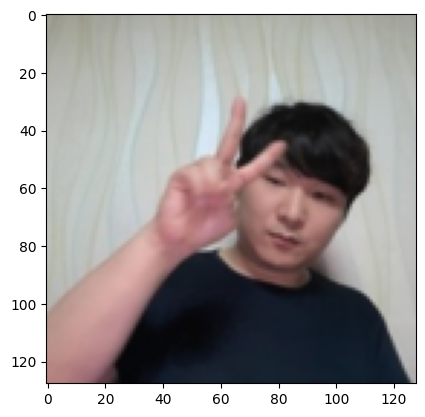

예측확률분포: [1.11933062e-02 9.87942398e-01 8.64246103e-04 1.07067187e-12
 1.32309788e-11 1.51186857e-13 2.11617269e-11 1.05067832e-12
 1.13738664e-10 1.39701965e-11 4.15731929e-13 4.36446858e-13
 4.32810593e-11 1.42714951e-10 4.22530934e-13 8.20633284e-11
 3.55809097e-11 1.64965958e-10 1.05302123e-09 4.07286621e-10]
라벨: 0, 예측결과: 1
87


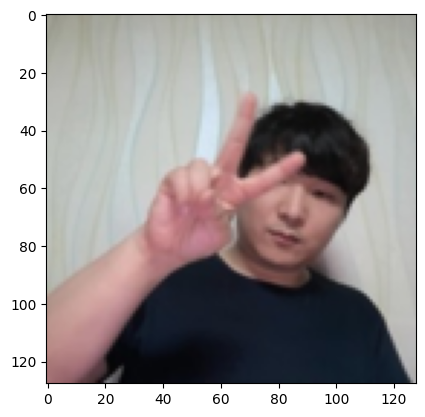

예측확률분포: [5.24130475e-04 9.99465287e-01 1.06209573e-05 1.43003204e-13
 1.16572377e-12 1.97999288e-15 4.58074160e-12 6.32653652e-14
 3.79674243e-12 4.37699546e-13 1.20676377e-14 2.15458280e-14
 1.44166927e-12 9.69682060e-12 1.41027953e-14 4.46362435e-12
 2.39143102e-12 9.08251512e-12 1.09444356e-10 1.71992958e-11]
라벨: 2, 예측결과: 1
257


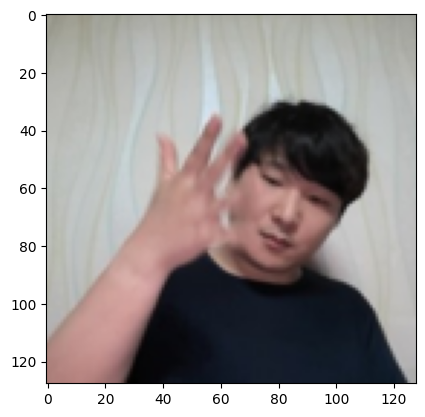

예측확률분포: [9.9999487e-01 3.3985471e-06 1.7181248e-06 7.3016179e-17 1.7617611e-14
 3.7419878e-15 1.6423604e-15 4.6482297e-15 4.3840721e-12 2.1510102e-13
 3.9663864e-16 2.8697165e-15 1.3962475e-12 1.3782938e-13 1.8623093e-15
 4.0746833e-12 3.2906832e-13 1.9958859e-12 8.7697330e-13 2.6561934e-13]
라벨: 2, 예측결과: 0
212


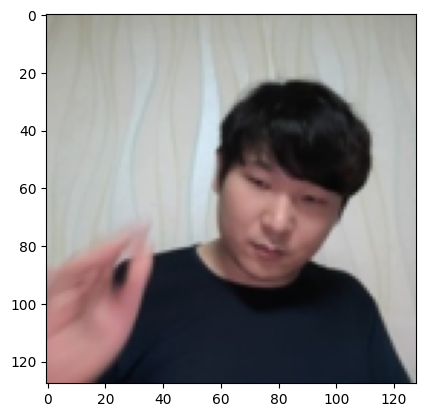

예측확률분포: [1.9103244e-01 8.0745298e-01 1.5145281e-03 9.1094656e-13 1.7990387e-11
 1.8298090e-13 1.7211135e-11 1.1465431e-12 2.3010152e-10 1.6999980e-11
 2.4194378e-13 5.7983522e-13 9.2716730e-11 2.1616242e-10 6.0633524e-13
 2.0730367e-10 5.9146604e-11 2.3552049e-10 9.2744712e-10 2.0762857e-10]
라벨: 2, 예측결과: 1
234


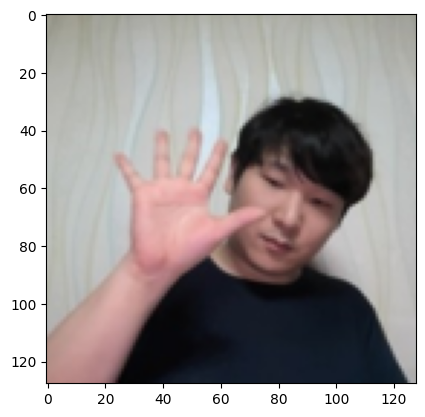

예측확률분포: [6.78441897e-02 8.69151729e-04 9.31286633e-01 5.74137160e-14
 8.98074844e-12 8.93621982e-12 6.28405585e-13 4.90614819e-13
 5.48514789e-10 5.00689976e-11 1.33536801e-12 2.50036347e-13
 4.24216051e-10 1.57223179e-10 1.99341498e-12 1.25792321e-10
 3.92769810e-11 1.07280095e-10 2.77378981e-10 1.70943329e-10]
라벨: 0, 예측결과: 2
40


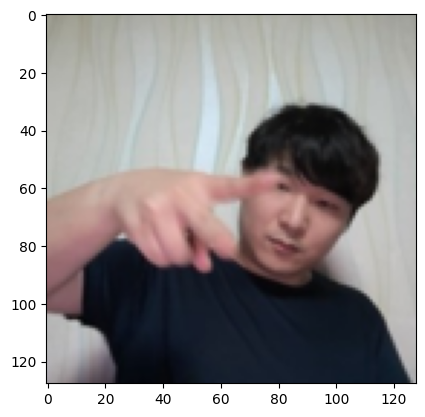

예측확률분포: [9.5443554e-02 9.0449035e-01 6.6111788e-05 2.3526005e-13 4.7596167e-12
 1.7912148e-14 7.5547494e-12 3.1905939e-13 4.1726726e-11 3.4295114e-12
 4.3284627e-14 1.4308300e-13 1.3626423e-11 4.4689544e-11 7.4916066e-14
 5.7959339e-11 1.6238327e-11 8.0105811e-11 3.6805325e-10 6.1240846e-11]
라벨: 2, 예측결과: 1
267


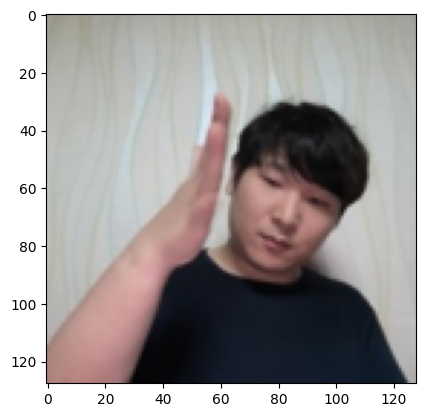

예측확률분포: [2.90863309e-02 9.69687223e-01 1.22650515e-03 7.44416952e-13
 1.42536581e-11 1.59590928e-13 2.06717369e-11 9.35558488e-13
 1.24522490e-10 1.25460545e-11 3.29301392e-13 4.00047725e-13
 5.31244805e-11 1.59717531e-10 4.31972681e-13 1.13974850e-10
 4.33346310e-11 1.90176402e-10 1.25881583e-09 2.82418339e-10]
라벨: 0, 예측결과: 1
35


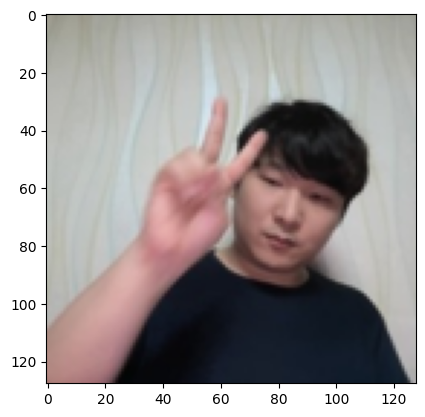

예측확률분포: [1.7192835e-01 7.6667678e-01 6.1394800e-02 5.8072718e-12 1.6120108e-10
 6.3092912e-12 9.6128765e-11 9.6862891e-12 1.5844912e-09 1.8297511e-10
 6.3440932e-12 4.0441517e-12 9.1530850e-10 2.1792306e-09 7.4555197e-12
 1.1320824e-09 4.3029116e-10 1.8711581e-09 6.8366091e-09 2.5637870e-09]
라벨: 2, 예측결과: 1
325


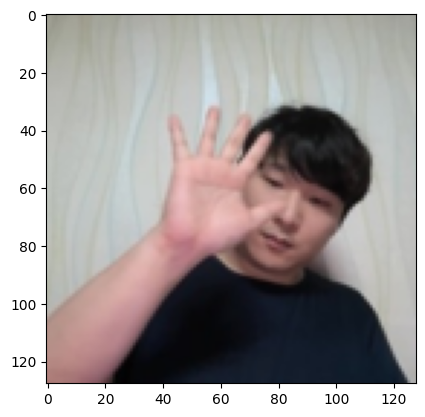

In [30]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)
        
samples = random.choices(population=wrong_predict_list, k=10) # k값을 수정하면 더 많은 값의 수를 볼 수 있다.

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    print(n)
    plt.show()

In [31]:
model.save('dataset/model/model.keras', include_optimizer=False)